---
title: "Python training (4 of 4): statistics and further visualisation"
format: gfm
--- 

This session is aimed as an overview of how to perform some statistical modelling with Python. **It is a Python workshop, not a statistics workshop** - if you'd like to better understand the statistical models, or need help deciding what's best for you, please consult a statistics resource or contact a statistician.

In this session, we'll cover

- Descriptive statistics
  - Measures of central tendancy
  - Measures of variability
  - Measures of correlation
  
- Inferential statistics
  - Linear regressions
  - T-tests
  - $\chi^2$ tests
  - Generalised regressions

- Visualising statistics
  - Adding lines to graphs to indicate bounds
  - Shading regions
  - Subplots
  - Boxplots

We'll use two new modules:
 - `scipy.stats`
 - `statsmodels`

## Setup

### Jupyter notebooks
As with last week, we're going to work from a Jupyter notebook.

#### Opening Jupyter

**If you installed Spyder via Anaconda**

Then you've already got it! Open the application "Jupyter" on your computer. Alternatively, open a command prompt / shell and type `jupyter notebook`.

**If you installed Spyder manually**

Then you'll probably need to get it. The simplest way is via a pip install.

1. Open a command prompt / shell
2. Type `pip install jupyterlab`
3. Once it's finished, type `jupyter notebook` in your shell

**If you can't install it**

If you're having issues with the installation, can't get it to work or don't want to, you can use [Google Colab](https://colab.google/) instead. Just sign in with your Google account and you gain access to a cloud-hosted notebook. Note that everything will save to your Google Drive.

#### Creating a notebook

Once you've opened Jupyter/Colab, 

1. Navigate to a folder on your computer where you'd like to save today's files. We suggest the project folder you've been using for the past two sessions. 
2. Press `New` -> `Notebook` to create your notebook. Select Python3 when prompted.

#### Using notebooks

The fundamental building block of jupyter notebooks is the **cell**. This is the block you can currently write in:

![](visualisation_files/figure-commonmark/cell_demo.png)

I can type Python code into this cell and run it. I can also change it to [markdown](https://www.markdownguide.org/) to type formatted code.

### Modules and Data

Let's import all our modules for today:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf

We'll be working from our "Players2024" dataset again. If you don't have it yet,

1. [Download the dataset](https://uqpug.github.io/datasets/Players2024.csv).
2. Create a folder in **in the same location as your script** called "data".
3. Save the dataset there.

To bring it in and clean it up,

In [2]:
df = pd.read_csv("data/Players2024.csv")
df = df[df["positions"] != "Missing"]
df = df[df["height_cm"] > 100]

## Descriptive Statistics

We'll start with sample size. All dataframes have most descriptive statistics functions available right off the bat which we access via the `.` operator. 

To calculate the number of non-empty observations in a column, say the numeric variable `df["height_cm"]`, we use the `.count()` method

In [3]:
df["height_cm"].count()

5932

### Measures of central tendancy
We can compute measures of central tendancy similarly. The average value is given by

In [4]:
df["height_cm"].mean()

183.04130141604855

the median by

In [5]:
df["height_cm"].median()

183.0

and the mode by

In [6]:
df["height_cm"].mode()

0    185.0
Name: height_cm, dtype: float64

> `.mode()` returns a dataframe with the most frequent values as there can be multiple.

#### Visualisation

Let's visualise our statistics as we go. We can start by producing a histogram of the heights with `seaborn`:

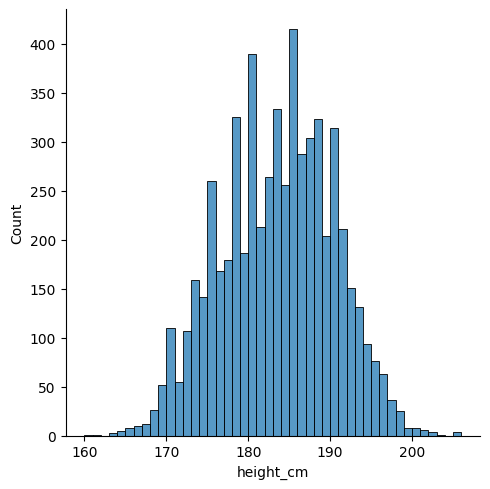

In [7]:
sns.displot(df["height_cm"], binwidth = 1)

We can use matplotlib to annotate the locations of these statistics. Let's save them into variables and then make the plot again. The important function is [`plt.vlines`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.vlines.html), which enables you to create vertical line(s) on your plot. We'll do it once for each so that we get separate legend entries. We'll need to provide the parameters

- `x = `
- `ymin = `
- `ymax = `
- `colors = `
- `linestyles = `
- `label = `

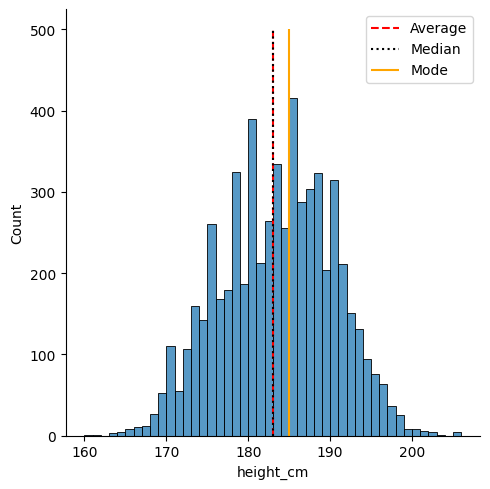

In [ ]:
# Save the statistics
height_avg = df["height_cm"].mean()
height_med = df["height_cm"].median()
height_mod = df["height_cm"].mode()

# Make the histogram
sns.displot(df["height_cm"], binwidth = 1)

# Annotate the plot with vertical and horizontal lines
plt.vlines(x = height_avg, ymin = 0, ymax = 500, colors = "r", linestyles = "dashed", label = "Average")
plt.vlines(x = height_med, ymin = 0, ymax = 500, colors = "k", linestyles = "dotted", label = "Median")
plt.vlines(x = height_mod, ymin = 0, ymax = 500, colors = "orange", linestyles = "solid", label = "Mode")

# Create the legend with the labels
plt.legend()


### Measures of variance

We can also compute measures of variance. The minimum and maximum are as expected

In [9]:
df["height_cm"].min()
df["height_cm"].max()

206.0

The range is the difference

In [10]:
df["height_cm"].max() - df["height_cm"].min()

46.0

Quantiles are given by `.quantile(...)` with the fraction inside. The inter-quartile range (IQR) is the difference between 25% and 75%.

In [11]:
q1 = df["height_cm"].quantile(0.25)
q3 = df["height_cm"].quantile(0.75)
IQR = q3 - q1

A column's standard deviation and variance are given by

In [12]:
df["height_cm"].std()
df["height_cm"].var()

46.7683158241558

And the standard error of the mean (SEM) with

In [13]:
df["height_cm"].sem()

0.08879229764682213

You can calculate the skewness and kurtosis (variation of tails) of a sample with

In [14]:
df["height_cm"].skew()
df["height_cm"].kurt()

-0.4338044567190438

All together, you can see a nice statistical summary with

In [15]:
df["height_cm"].describe()

count    5932.000000
mean      183.041301
std         6.838736
min       160.000000
25%       178.000000
50%       183.000000
75%       188.000000
max       206.000000
Name: height_cm, dtype: float64

#### Visualisation

Let's take our previous visualisation and shade in the IQR and standard deviations. We'll need to save the IQR and then use the `plt.fill_between()` function with the parameters

- `x = `
- `y1 = `
- `y2 = `
- `alpha = `  (for the opacity)
- `label = `

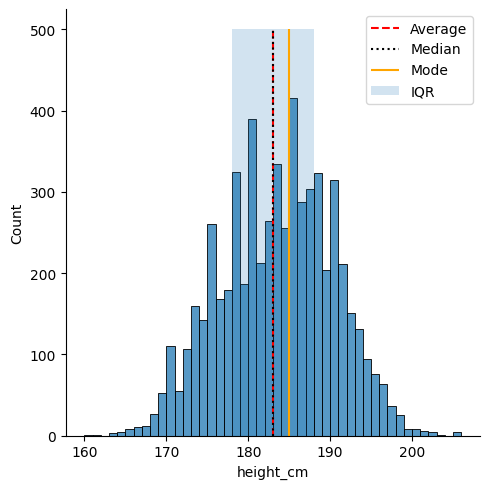

In [16]:
# Save the statistics
height_tot = df["height_cm"].count()
height_avg = df["height_cm"].mean()
height_med = df["height_cm"].median()
height_mod = df["height_cm"].mode()

# Save the quartiles as well
height_Q1 = df["height_cm"].quantile(0.25)
height_Q3 = df["height_cm"].quantile(0.75)

# Make the histogram
sns.displot(df["height_cm"], binwidth = 1)

# Annotate the plot with vertical and horizontal lines
plt.vlines(x = height_avg, ymin = 0, ymax = 500, colors = "r", linestyles = "dashed", label = "Average")
plt.vlines(x = height_med, ymin = 0, ymax = 500, colors = "k", linestyles = "dotted", label = "Median")
plt.vlines(x = height_mod, ymin = 0, ymax = 500, colors = "orange", linestyles = "solid", label = "Mode")

# Shade in the IQR
plt.fill_between(x = [height_Q1, height_Q3], y1 = 0, y2 = 500, alpha = 0.2, label = "IQR")

# Create the legend with the labels
plt.legend()


### Measures of correlation

If you've got two numeric variables, you might want to examine covariance and correlation. These indicate how strongly the variables are linearly related. We'll need to use the `df["age"]` variable as well.

The covariance between "height_cm" and "age" is

In [17]:
df["height_cm"].cov(df["age"])

0.5126608276592359

> The `.cov()` function compares the column it's attached to (here `df["height_cm"]`) with the column you input (here `df["age"]`). This means we could swap the columns without issue:
>
> ```{python}
> df["age"].cov(df["height_cm"])
> ```

Similarly, we can find the Pearson correlation coefficient between two columns. 

In [18]:
df["height_cm"].corr(df["age"])

0.01682597901197303

You can also specify "kendall" or "spearman" for their respective correlation coefficients

In [19]:
df["height_cm"].corr(df["age"], method = "kendall")
df["height_cm"].corr(df["age"], method = "spearman")

0.007604345289158663

### Reminder about groupbys

Before we move to inferential statistics, it's worth reiterating the power of groupbys discussed in the second workshop.

To group by a specific variable, like "positions", we use 

In [20]:
gb = df.groupby("positions")

By applying our statistics to the `gb` object, we'll apply them to *every* variable for *each* position. Note that we should specify `numeric_only = True`, because these statistics won't work for non-numeric variables

In [21]:
averages = gb.mean(numeric_only = True)
averages

,height_cm,age
positions,,
Attack,180.802673,25.061108
Defender,184.193269,25.716471
Goalkeeper,190.668508,26.587017
Midfield,180.497017,25.201671


#### Visualisation

Let's visualise these two results. We'll look at creating linear regressions a bit later, so for now we'll instead look at how matplotlib lets us combine three separate plots into a single figure.

Because we're creating multiple plots, we'll need to use the **axes-level interface**. This means using `sns.scatterplot` instead of `sns.relplot` etc.

For our first one, we'll just do a scatterplot between the **age** and **height** variables:

<Axes: xlabel='age', ylabel='height_cm'>

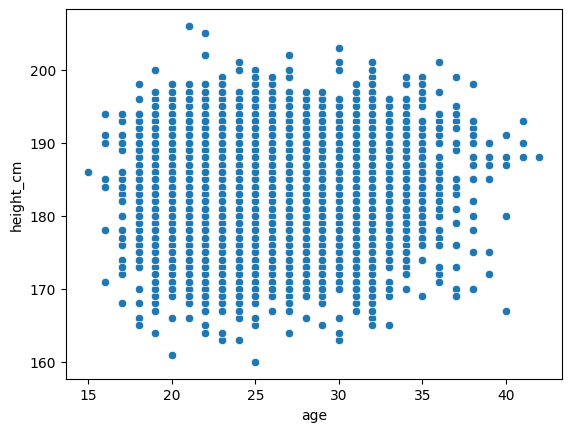

In [22]:
sns.scatterplot(df, x = "age", y = "height_cm")

Next, we'll make a bars plot of the average heights and ages per position from our group by object

<Axes: xlabel='positions', ylabel='height_cm'>

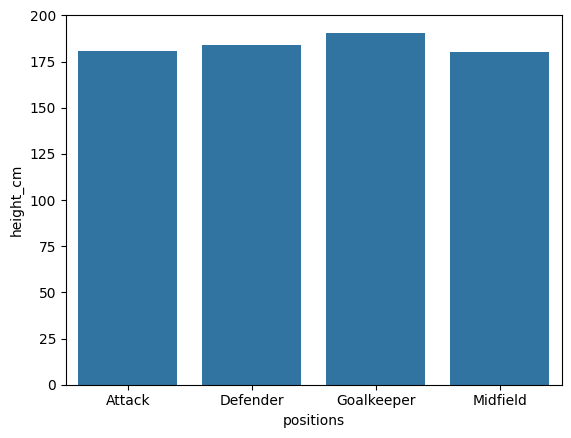

In [23]:
sns.barplot(averages, x = "positions", y = "height_cm")

<Axes: xlabel='positions', ylabel='age'>

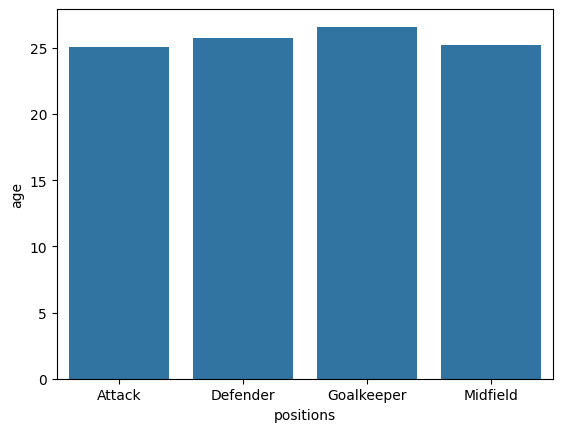

In [24]:
sns.barplot(averages, x = "positions", y = "age")

Finally, we need to use the [`plt.subplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) function to bring them all together.

It works a bit weirdly. Each time we make a plot, we call it *first*, telling matplotlib that we're making a new plot at a new index. It looks like `plt.subplot(nrows, ncols, index)`, so if we want a $1 \times 3$ figure, we'll go

```python
plt.subplot(1, 3, 1)
# Plot 1

plt.subplot(1, 3, 2)
# Plot 2

plt.subplot(1, 3, 3)
# Plot 3
```

<Axes: xlabel='positions', ylabel='age'>

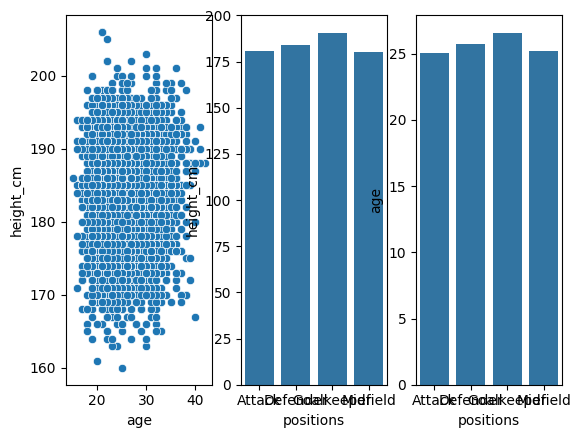

In [25]:
plt.subplot(1, 3, 1)
sns.scatterplot(df, x = "age", y = "height_cm")

plt.subplot(1, 3, 2)
sns.barplot(averages, x = "positions", y = "height_cm")

plt.subplot(1, 3, 3)
sns.barplot(averages, x = "positions", y = "age")

We can change the dimensions of our figure by using the `plt.subplots(...)` (notice the plural `s`) to preconfigure the settings for our plot

<Axes: xlabel='positions', ylabel='age'>

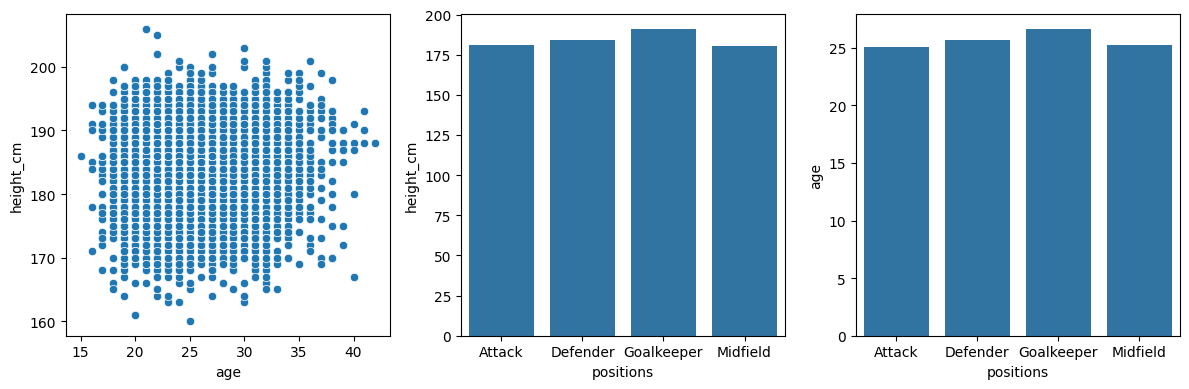

In [26]:
plt.subplots(1, 3, tight_layout = True, figsize = (12,4))

plt.subplot(1, 3, 1)
sns.scatterplot(df, x = "age", y = "height_cm")

plt.subplot(1, 3, 2)
sns.barplot(averages, x = "positions", y = "height_cm")

plt.subplot(1, 3, 3)
sns.barplot(averages, x = "positions", y = "age")

## Inferential Statistics

Inferential statistics requires using the module `scipy.stats`.

### Simple linear regressions

Least-squares regression for two sets of measurements can be performed with the function `stats.linregress()`"

In [27]:
stats.linregress(x = df["age"], y = df["height_cm"])

LinregressResult(slope=0.02582749476456191, intercept=182.38260451315895, rvalue=0.01682597901197303, pvalue=0.19506275453364208, stderr=0.01993026652960195, intercept_stderr=0.515991957177263)

If we store this as a variable, we can access the different values with the `.` operator. For example, the p-value is

In [28]:
lm = stats.linregress(x = df["age"], y = df["height_cm"])
lm.pvalue

0.19506275453364208

#### Visualisation

Let's look at implementing the linear regression into our scatter plot from before. Using the scatterplot from before,

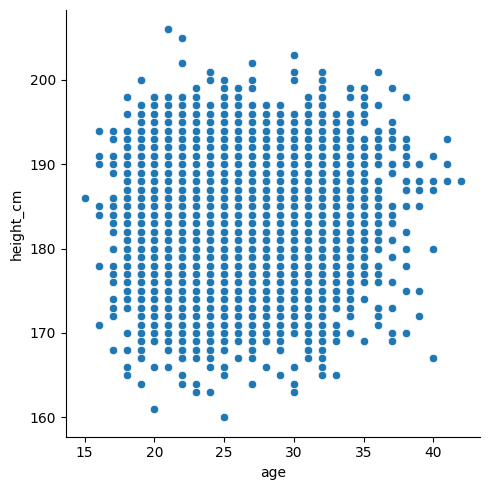

In [29]:
sns.relplot(data = df, x = "age", y = "height_cm")

we'll need to plot the regression as a line. For reference,

$$ y = \text{slope}\times x + \text{intercept}$$

So

<Axes: xlabel='age', ylabel='height_cm'>

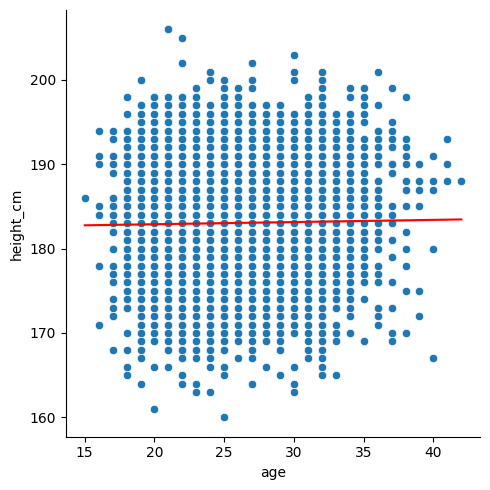

In [30]:
sns.relplot(data = df, x = "age", y = "height_cm")

# Construct the linear regression
x_lm = df["age"]
y_lm = lm.slope*x_lm + lm.intercept

# Plot the line plot
sns.lineplot(x = x_lm, y = y_lm, color = "r")

Finally, we can include the details of the linear regression in the legend by specifying them in the label. We'll need to `round()` them and `str()` them (turn them into strings) so that we can include them in the message.

<Axes: xlabel='age', ylabel='height_cm'>

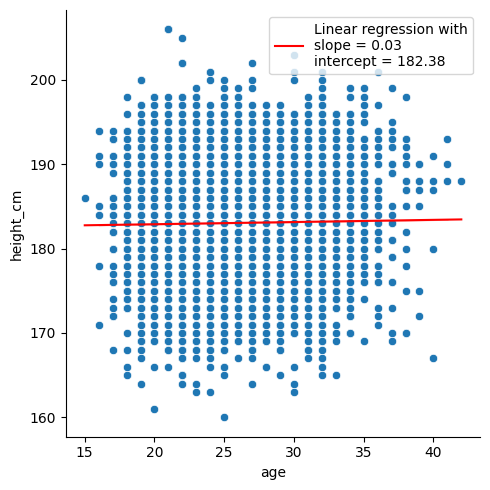

In [31]:
sns.relplot(data = df, x = "age", y = "height_cm")

# Construct the linear regression
x_lm = df["age"]
y_lm = lm.slope*x_lm + lm.intercept

# Round and stringify the values
slope_rounded = str(round(lm.slope, 2))
intercept_rounded = str(round(lm.intercept, 2))

# Plot the line plot
linreg_label = "Linear regression with\nslope = " + slope_rounded + "\nintercept = " + intercept_rounded
sns.lineplot(x = x_lm, y = y_lm, color = "r", label = linreg_label)

### $t$-tests

We can also perform $t$-tests with the `scipy.stats` module. Typically, this is performed to examine the statistical signficance of a difference between two samples' means. Let's examine whether that earlier groupby result for is accurate for heights, specifically, **are goalkeepers taller than non-goalkeepers?**

The function [`stats.ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) requires us to send in the two groups as separate columns, so we'll need to do a bit of reshaping.

Let's start by creating a new variable for *goalkeeper status*, and then separate the goalkeepers from the non-goalkeepers in two variables

In [32]:
df["gk"] = df["positions"] == "Goalkeeper"

goalkeepers = df[df["gk"] == True]
non_goalkeepers = df[df["gk"] == False]

The $t$-test for the means of two independent samples is given by

In [33]:
stats.ttest_ind(goalkeepers["height_cm"], non_goalkeepers["height_cm"])

TtestResult(statistic=35.2144964816995, pvalue=7.551647917141636e-247, df=5930.0)

Yielding a p-value of $8\times 10^{-247}\approx 0$, indicating that the null-hypothesis (*heights are the same*) is extremely unlikely.

#### Visualisation

We can also visualise these results with boxplots, showing the distributions and their statistical summary. These demonstrate that there is clearly a significant different in the distributions:

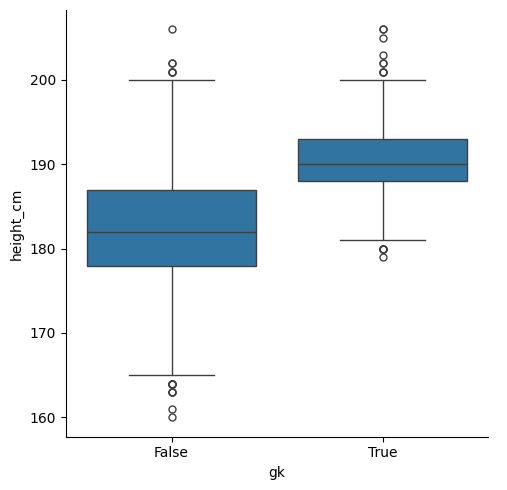

In [34]:
sns.catplot(df, x = "gk", y = "height_cm", kind = "box")

### $\chi^2$ tests

$χ^2$ tests are useful for examining the relationship of categorical variables by comparing the frequencies of each. Often, you'd use this if you can make a contingency table.

We only have one useful categorical variable here, "positions" (the others have too many unique values), so we'll need to create another. Let's see if there's a relationship between players' positions and names with the letter "a".

Make a binary column for players with the letter "a" in their names. To do this, we need to apply a string method to *all* the columns in the dataframe as follows

In [35]:
df["a_in_name"] = df["name"].str.contains("a")

Let's cross tabulate positions with this new column

In [36]:
a_vs_pos = pd.crosstab(df["positions"],df["a_in_name"])
print(a_vs_pos)

a_in_name   False  True 
positions               
Attack        291   1280
Defender      355   1606
Goalkeeper    149    575
Midfield      312   1364


The $χ^2$ test's job is to examine whether players' positions depend on the presence of "a" in their name. To evaluate it we need to send the contingency table in:

In [37]:
stats.chi2_contingency(a_vs_pos)

Chi2ContingencyResult(statistic=2.1808405074930404, pvalue=0.5357320466340116, dof=3, expected_freq=array([[ 293.17211733, 1277.82788267],
       [ 365.9519555 , 1595.0480445 ],
       [ 135.10923803,  588.89076197],
       [ 312.76668914, 1363.23331086]]))

### More complex modelling

If you need to do more advanced statistics, particularly if you need more regressions, you'll likely need to turn to a different package: `statsmodels`. It is particularly useful for **statistical modelling**.

We'll go through three examples

1. Simple linear regressions (like before)
2. Multiple linear regressions
3. Logistic regressions

What's nice about `statsmodels` is that it gives an R-like interface and summaries.

#### Simple linear regressions revisited

Let's perform the same linear regression as before, looking at the "age" and "height variables". Our thinking is that players' heights dictate how long they can play, so we'll make $x = \text{height}$ and $y = \text{age}$.

The first step is to make the set up the variables. We'll use the function `smf.ols()` for ordinary least squares. It takes in two imputs:

* The formula string, in the form `y ~ X1 + X2 ...`
* The data

We create the model and compute the fit

In [38]:
mod = smf.ols("height_cm ~ age", df)
res = mod.fit()

Done! Let's take a look at the results

In [39]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              height_cm   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.679
Date:                Mon, 24 Mar 2025   Prob (F-statistic):              0.195
Time:                        14:25:57   Log-Likelihood:                -19821.
No. Observations:                5932   AIC:                         3.965e+04
Df Residuals:                    5930   BIC:                         3.966e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    182.3826      0.516    353.460      0.000     181.371     183.394
age            0.0258      0.020      1.296      0.195      -0.013       0.065
==============================================================================
Omnibus:                       86.537   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.098
Skew:                          -0.098   Prob(JB):                     6.58e-13
Kurtosis:                       2.566   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

\
That's a lot nicer than with scipy. We can also make our plot from before by getting the model's $y$ values with `res.fittedvalues`

<Axes: xlabel='age', ylabel='height_cm'>

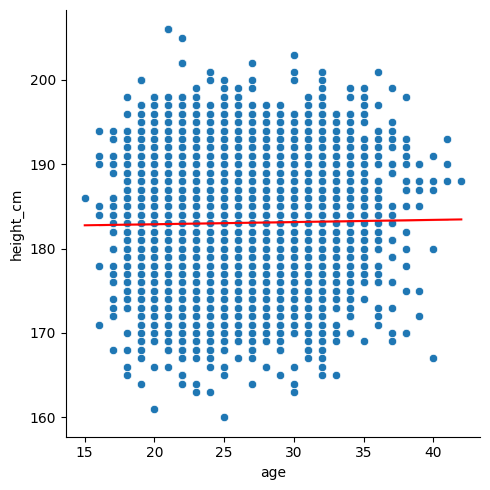

In [40]:
sns.relplot(data = df, x = "age", y = "height_cm")
sns.lineplot(x = df["age"], y = res.fittedvalues, color = "r")

#### Generalised linear models

The `statsmodels` module has lots of advanced statistical models available. We'll take a look at one more: Generalised Linear Models. The distributions they include are

* Binomial
* Poisson
* Negative Binomial
* Gaussian (Normal)
* Gamma
* Inverse Gaussian
* Tweedie

We'll use the *binomial* option to create logistic regressions.

Logistic regressions examine the distribution of binary data. For us, we can compare the heights of **goalkeepers vs non-goalkeepers** again. Let's convert our **gk** column from `True` $\rightarrow$ `1` and `False` $\rightarrow$ `0` by converting to an `int`:

In [41]:
df["gk"] = df["gk"].astype(int)

Now, we can model this column with height. Specifically,

$$ \text{gk} \sim \text{height}$$

Start by making the model with the function `smf.glm()`. We need to specify the family of distributions; they all live in `sm.families`, which comes from a different submodule that we should import:

In [42]:
import statsmodels.api as sm
mod = smf.glm("gk ~ height_cm", data = df, family = sm.families.Binomial())

Next, evaluate the results

In [43]:
res = mod.fit()

Let's have a look at the summary:

In [44]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     gk   No. Observations:                 5932
Model:                            GLM   Df Residuals:                     5930
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1583.5
Date:                Mon, 24 Mar 2025   Deviance:                       3167.0
Time:                        14:25:58   Pearson chi2:                 4.02e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1879
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -53.2336      1.927    -27.622      0.000     -57.011     -49.456
height_cm      0.2745      0.010     26.938      0.000       0.255       0.294
==============================================================================
"""

Finally, we can plot the result like before

<Axes: xlabel='height_cm', ylabel='gk'>

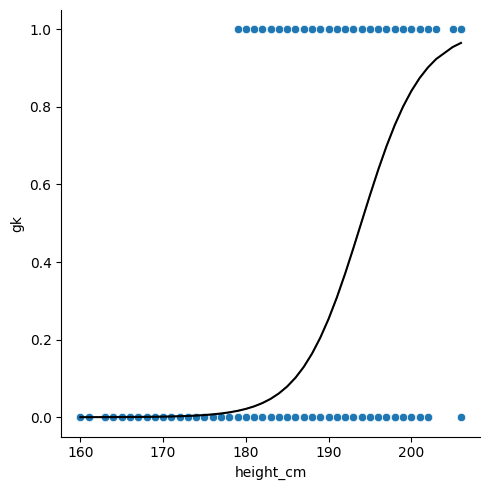

In [45]:
sns.relplot(data = df, x = "height_cm", y = "gk")
sns.lineplot(x = df["height_cm"], y = res.fittedvalues, color = "black")

## Conclusion

Python definitely has powerful tools for statistics and visualisations! If any of
the content here was too challenging, you have other related issues
you’d like to discuss or would simply like to learn more, we the
technology training team would love to hear from you. You can contact us
at <training@library.uq.edu.au>.

Here’s a summary of what we’ve covered

| Topic | Description |
|------------------------------------|------------------------------------|
| **Descriptive statistics** | Using built-in methods to pandas series (via `df["variable"].___` for a dataframe `df`) we can apply descriptive statistics to our data. |
| **Using matplotlib to include statistical information** | Using `plt.vlines()` and `plt.fill_between()`, we can annotate the plots with lines showing statistically interesting values. |
| **Subplotting** | The matplotlib functions `plt.subplots()` and `plt.subplot()` let us place multiple plots in the same figure. |
| **Inferential statistics** | Using the `scipy.stats` and `statsmodels` modules, we can perform statistical tests and modelling. |


### Resources

- [Official scipy.stats documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [Official statsmodels documentation](https://www.statsmodels.org/stable/index.html)
- [Official seaborn documentation](https://seaborn.pydata.org/index.html)
- [Official matplotlib documentation](https://matplotlib.org/stable/index.html)
- Our [compilation of useful Python links](https://github.com/uqlibrary/technology-training/blob/master/Python/useful_links.md)